In [21]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
from sklearn import linear_model
import matplotlib.pyplot as plt

In [24]:
file_name = "fixtures.csv"

df = pd.read_csv(Path(os.path.join("./data",file_name)))
df

,ISO_bascula,Poli_bascula,PLC_iso,PLC_poli
0,3678,3128,3174,3104
1,3674,3124,3338,3076
2,3652,3090,3308,3121
3,3638,3082,3356,2965
4,3658,3082,3189,3045
5,3626,3084,3275,2969
6,3658,3080,3308,3021
7,3650,3104,3193,3055
8,3672,3130,3286,2952


In [8]:
# Separacion de liquidos
# ISO
df_iso = df.iloc[:,[0,2]]

# Separacion de Poli
df_poli = df.iloc[:,[1,3]]

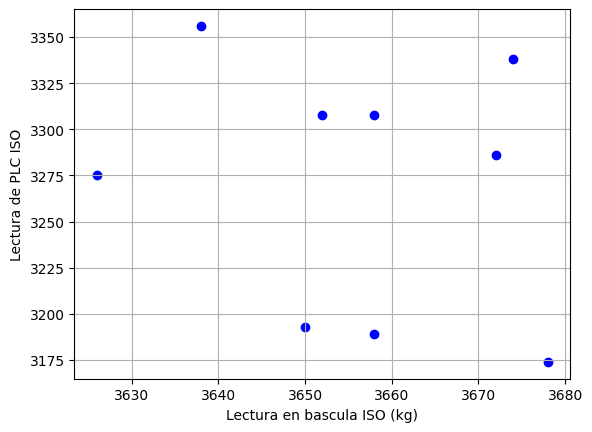

In [23]:
plt.ylabel("Lectura de PLC ISO")
plt.xlabel("Lectura en bascula ISO (kg)")
plt.scatter(df_iso["ISO_bascula"],df_iso["PLC_iso"],color="b")
plt.grid(True)
plt.show()

In [18]:
# Construccion del vector de caracteristicas, la variable independiente
df_poli_bascula = df_poli["Poli_bascula"].values.reshape((-1,1))
df_poli_bascula

array([[3128],
       [3124],
       [3090],
       [3082],
       [3082],
       [3084],
       [3080],
       [3104],
       [3130]], dtype=int64)

[3011.51498308 3022.7438376  3033.97269212 3045.20154664 3056.43040116
 3067.65925568]
Interseccion (b) 1293.5002416626405
Pendiente (m) [0.56144273]


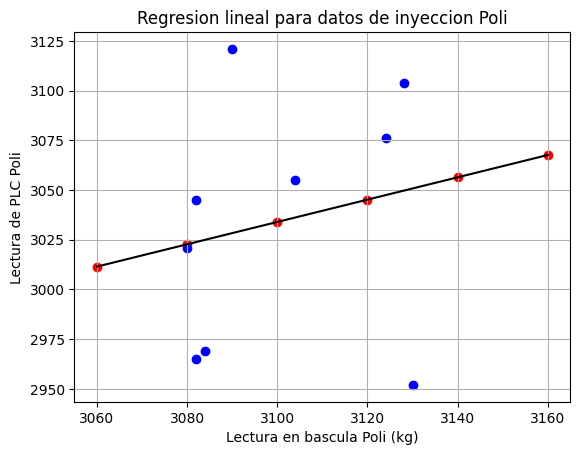

In [36]:
regresion = linear_model.LinearRegression()
# Construccion del modelo
modelo = regresion.fit(df_poli_bascula,df_poli["PLC_poli"])

# Puntos para prediccion en el modelo
# entrada = [[3600],[3620],[3640],[3660],[3680],[3700]]
entrada = [[3060],[3080],[3100],[3120],[3140],[3160]]
# modelo.predict(entrada)
print(modelo.predict(entrada))

# Parametros del modelo
print(f"Interseccion (b) {modelo.intercept_}")
print(f"Pendiente (m) {modelo.coef_}")

plt.scatter(entrada,modelo.predict(entrada),color="red")
plt.plot(entrada,modelo.predict(entrada),color="black")

plt.title("Regresion lineal para datos de inyeccion Poli")
plt.ylabel("Lectura de PLC Poli")
plt.xlabel("Lectura en bascula Poli (kg)")
plt.scatter(df_poli["Poli_bascula"],df_poli["PLC_poli"],color="b")
plt.grid(True)
plt.show()

[3094.77414494 3097.46716317 3100.16018141 3102.85319964 3105.54621788
 3108.23923611]
Interseccion (b) 2896.1640501046863
Pendiente (m) [0.06732546]


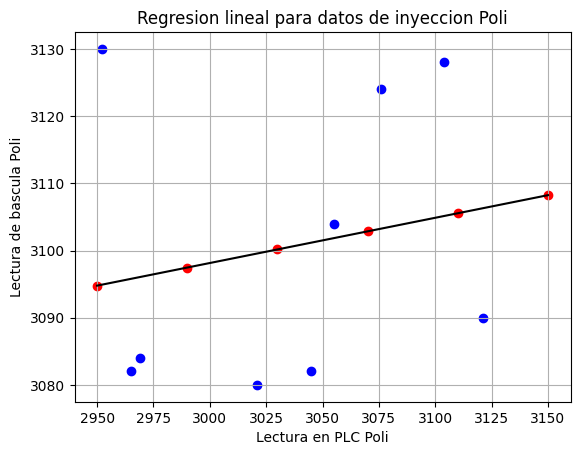

In [42]:
# a la inversa, tomando en cuenta como variable independiente la lectura del PLC
# y variable dependiente la lectura de la bascula

# Datos de la variable independiente (lecturas del PLC)
df_poli_PLC = df_poli["PLC_poli"].values.reshape((-1,1))
df_poli_PLC

regresion = linear_model.LinearRegression()
# Construccion del modelo
modelo = regresion.fit(df_poli_PLC,df_poli["Poli_bascula"])

# Puntos para prediccion en el modelo
# entrada = [[3600],[3620],[3640],[3660],[3680],[3700]]
entrada = [[2950],[2990],[3030],[3070],[3110],[3150]]
# modelo.predict(entrada)
print(modelo.predict(entrada))

# Parametros del modelo
print(f"Interseccion (b) {modelo.intercept_}")
print(f"Pendiente (m) {modelo.coef_}")

plt.scatter(entrada,modelo.predict(entrada),color="red")
plt.plot(entrada,modelo.predict(entrada),color="black")

plt.title("Regresion lineal para datos de inyeccion Poli")
plt.ylabel("Lectura de bascula Poli")
plt.xlabel("Lectura en PLC Poli")
plt.scatter(df_poli["PLC_poli"],df_poli["Poli_bascula"],color="b")
plt.grid(True)
plt.show()